In [9]:
import numpy as np
from numba import jit
import pints
import pints.plot
import pints_smol_moments_4_normalised_jit_clus_size_pro as toy
import matplotlib.pyplot as plt

import scipy.stats as stats



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [10]:

model = toy.SmolModel(None,None)


true_parameters = [0.0002, 0.0025, 500]


times = np.linspace(0, 97, 9700)

org_values = model.simulate(true_parameters, times)

print(org_values)

print(org_values.shape)

parameter_names = ["b","p","N"]


[[5.00000000e+00 2.47500000e+03 9.84937059e+00 9.80101010e+01]
 [4.99762595e+00 2.47003009e+03 9.84936644e+00 9.80100470e+01]
 [4.99525427e+00 2.46507385e+03 9.84935401e+00 9.80098853e+01]
 ...
 [8.44548969e+00 2.29577538e+01 8.73159430e-01 2.77129946e+00]
 [8.45747169e+00 2.31107276e+01 8.73711704e-01 2.77217303e+00]
 [8.46947746e+00 2.32645533e+01 8.74265984e-01 2.77305137e+00]]
(9700, 4)


In [11]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


Additive noise

In [12]:
# noise = 1
# values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
# problem = pints.MultiOutputProblem(model, times, values)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_prior = pints.UniformLogPrior(
#     [0.0001, 0.001, 100],
#     [0.001, 0.01, 2000]
#     )
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 2000
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains_1 = mcmc.run()

# print(chains_1)

# ITERS = 2000
# print(3*ITERS/4)

# pints.plot.trace(chains_1)
# plt.savefig("noisy_data_noise_1_additive_moments.png")
# plt.show()

# pints.plot.trace(chains_1[:,int(4*ITERS/5):, :])
# # plt.savefig("noisy_data_additive_moments.png")
# plt.show()

# pints.plot.histogram(chains_1[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
# plt.savefig("hist_only_noisy_data_noise_1_additive_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_1[:,int(3*ITERS/4):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)

In [13]:
# noise = 5
# values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
# problem = pints.MultiOutputProblem(model, times, values)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_prior = pints.UniformLogPrior(
#     [0.0001, 0.001, 100],
#     [0.001, 0.01, 2000]
#     )
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 2000
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains_5 = mcmc.run()

# print(chains_5)

# ITERS = 2000
# print(3*ITERS/4)

# pints.plot.trace(chains_5)
# plt.savefig("noisy_data_noise_5_additive_moments.png")
# plt.show()

# pints.plot.trace(chains_5[:,int(4*ITERS/5):, :])
# # plt.savefig("noisy_data_additive_moments.png")
# plt.show()

# pints.plot.histogram(chains_5[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
# plt.savefig("hist_only_noisy_data_noise_5_additive_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_5[:,int(3*ITERS/4):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)

In [14]:
# noise = 10
# values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
# problem = pints.MultiOutputProblem(model, times, values)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_prior = pints.UniformLogPrior(
#     [0.0001, 0.001, 100],
#     [0.001, 0.01, 2000]
#     )
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 2000
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains_10 = mcmc.run()

# print(chains_10)

# ITERS = 2000
# print(3*ITERS/4)

# pints.plot.trace(chains_10)
# plt.savefig("noisy_data_noise_10_additive_moments.png")
# plt.show()

# pints.plot.trace(chains_10[:,int(4*ITERS/5):, :])
# # plt.savefig("noisy_data_additive_moments.png")
# plt.show()

# pints.plot.histogram(chains_10[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
# plt.savefig("hist_only_noisy_data_noise_10_additive_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_10[:,int(3*ITERS/4):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)

In [15]:
# noise = 10
# values = org_values + noise * np.random.normal(0, 1, org_values.shape)
# problem = pints.MultiOutputProblem(model, times, values)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_prior = pints.UniformLogPrior(
#     [0.0001, 0.001, 100],
#     [0.001, 0.01, 2000]
#     )
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 2000
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains_10_var = mcmc.run()

# print(chains_10_var)

# ITERS = 2000
# print(3*ITERS/4)

# pints.plot.trace(chains_10_var)
# plt.savefig("noisy_data_noise_10_larger_st_dev_additive_moments.png")
# plt.show()

# pints.plot.trace(chains_10_var[:,int(4*ITERS/5):, :])
# # plt.savefig("noisy_data_additive_moments.png")
# plt.show()

# pints.plot.histogram(chains_10_var[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
# plt.savefig("hist_only_noisy_data_noise_10_larger_st_dev_additive_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_10_var[:,int(3*ITERS/4):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_23155/2350072894.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.1
1     159     0:03.9
2     285     0:08.5
3     399     0:10.8
20    2223    0:47.3
40    4623    1:31.9
60    7368    2:21.1
80    9765    3:03.3
100   12297   3:47.1
120   14754   4:29.0
140   17406   5:13.2
160   20001   5:56.6
180   22536   6:39.7
200   25191   7:24.1
220   27753   8:07.1
240   30144   8:47.1
260   32685   9:31.4
280   35301  10:16.0
300   37782  10:59.7
320   40173  11:42.3
340   42720  12:26.6
360   45459  13:14.3
380   47967  14:01.3
400   50613  14:48.6
420   53247  15:34.9
440   55845  16:21.6
460   58335  17:04.6
480   60930  17:49.1
500   63411  18:30.6
520   66084  19:15.2
540   68682  19:58.6
560   71244  20:41.9
580   73734  21:23.7
600   76218  22:05.4
620   78600  22:45.6
640   81057  23:26.2
660   83550  24:07.3
680   86055  24:49.1
700   88605  25:33.3
720   91119  26:15.7
740   93627  26:57.6
760   96195  27:40.5
780   98877  28:

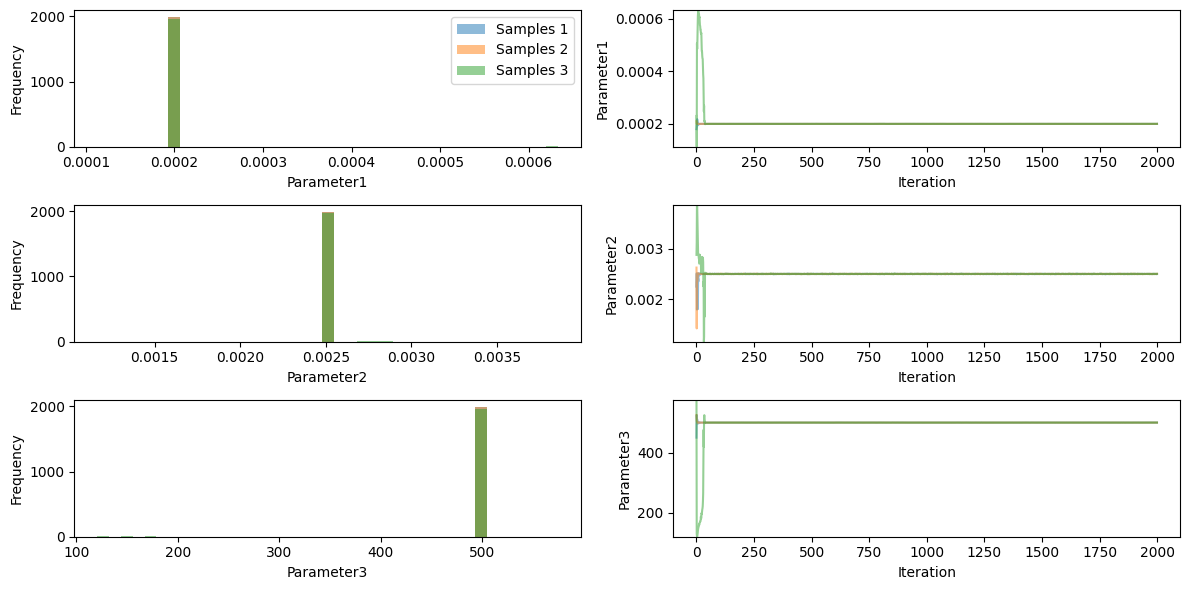

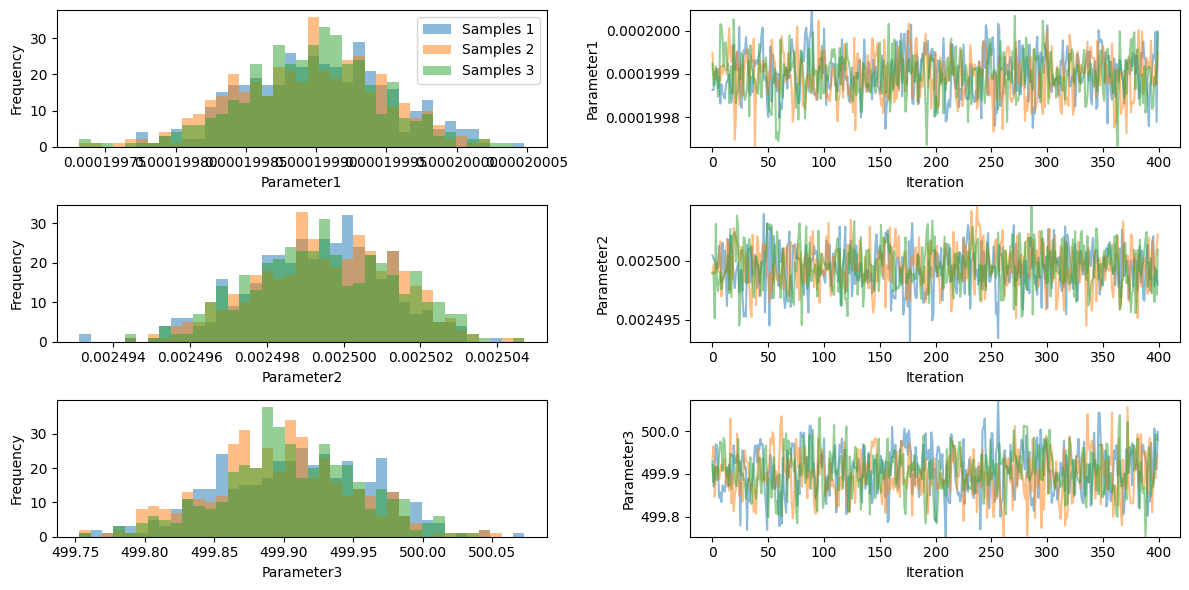

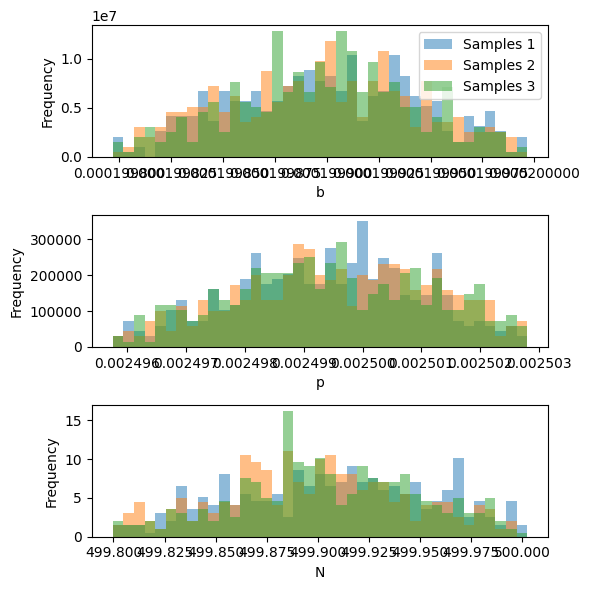

<class '__main__.MyMCMCSummary'>
param    mean    std.      2.5%    25%     50%     75%     97.5%    rhat    ess    ess per sec.
-------  ------  --------  ------  ------  ------  ------  -------  ------  -----  --------------
b        0.0002  5.14e-08  0.0002  0.0002  0.0002  0.0002  0.0002   1       394    0.0917
p        0.0025  1.83e-06  0.0025  0.0025  0.0025  0.0025  0.0025   1       453    0.105
N        500     0.0534    500     500     500     500     500      1       356    0.0828


In [18]:
noise = 25
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 2000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_25 = mcmc.run()

print(chains_25)

ITERS = 2000
print(3*ITERS/4)

pints.plot.trace(chains_25)
plt.savefig("noisy_data_noise_25_additive_moments.png")
plt.show()

pints.plot.trace(chains_25[:,int(4*ITERS/5):, :])
plt.savefig("noisy_data_additive_moments.png")
plt.show()

pints.plot.histogram(chains_25[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
plt.savefig("hist_only_noisy_data_noise_25_additive_moments.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_25[:,int(3*ITERS/4):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

In [97]:
def MyHistogram(
        samples,
        kde=False,
        n_percentiles=None,
        parameter_names=None,
        ref_parameters=None):
    """
    Takes one or more markov chains or lists of samples as input and creates
    and returns a plot showing histograms for each chain or list of samples.

    Returns a ``matplotlib`` figure object and axes handle.

    Parameters
    ----------
    samples
        A list of lists of samples, with shape
        ``(n_lists, n_samples, n_parameters)``, where ``n_lists`` is the
        number of lists of samples, ``n_samples`` is the number of samples in
        one list and ``n_parameters`` is the number of parameters.
    kde
        Set to ``True`` to include kernel-density estimation for the
        histograms.
    n_percentiles
        Shows only the middle n-th percentiles of the distribution.
        Default shows all samples in ``samples``.
    parameter_names
        A list of parameter names, which will be displayed on the x-axis of the
        histogram subplots. If no names are provided, the parameters are
        enumerated.
    ref_parameters
        A set of parameters for reference in the plot. For example, if true
        values of parameters are known, they can be passed in for plotting.
    """
    import matplotlib
    import matplotlib.pyplot as plt


    # If we switch to Python3 exclusively, bins and alpha can be keyword-only
    # arguments
    bins = 40
    alpha = 0.5

    samples = np.asarray(samples)
    n_list = len(samples)
    _, n_param = samples[0].shape

    # Check parameter names
    if parameter_names is None:
        parameter_names = ['Parameter' + str(i + 1) for i in range(n_param)]
    elif len(parameter_names) != n_param:
        raise ValueError(
            'Length of `parameter_names` must be same as number of'
            ' parameters.')

    # Check number of parameters
    for samples_j in samples:
        if n_param != samples_j.shape[1]:
            raise ValueError(
                'All samples must have the same number of parameters.'
            )

    # Check reference parameters
    if ref_parameters is not None:
        if len(ref_parameters) != n_param:
            raise ValueError(
                'Length of `ref_parameters` must be same as number of'
                ' parameters.')

    # Set up figure
    fig, axes = plt.subplots(
        n_param, 1, figsize=(6, 2 * n_param),
        squeeze=False,    # Tell matlab to always return a 2d axes object
    )

    # Find ranges across all samples
    stacked_chains = np.vstack(samples)
    if n_percentiles is None:
        xmin = np.min(stacked_chains, axis=0)
        xmax = np.max(stacked_chains, axis=0)
    else:
        xmin = np.percentile(stacked_chains,
                             50 - n_percentiles / 2.,
                             axis=0)
        xmax = np.percentile(stacked_chains,
                             50 + n_percentiles / 2.,
                             axis=0)
    xbins = np.linspace(xmin, xmax, bins)

    # Plot first samples
    for i in range(n_param):
        for j_list, samples_j in enumerate(samples):
            if i == 0:
                # Add histogram subplot
                axes[i, 0].set_xlabel(parameter_names[i])
                axes[i, 0].set_ylabel('Frequency')
                axes[i, 0].hist(
                    samples_j[:, i], bins=xbins[:, i], alpha=alpha,
                    density=True, label='Samples ' + str(1 + j_list))
                xlabels = xbins[:, i][::2]
                xlabels = np.around(xlabels, decimals=8, out=None)
                axes[i, 0].set_xticklabels(xlabels,rotation=45)
            else:# Add histogram subplot
                axes[i, 0].set_xlabel(parameter_names[i])
                axes[i, 0].set_ylabel('Frequency')
                axes[i, 0].hist(
                    samples_j[:, i], bins=xbins[:, i], alpha=alpha,
                    density=True, label='Samples ' + str(1 + j_list))
                

            # Add kde plot
            if kde:
                x = np.linspace(xmin[i], xmax[i], 100)
                axes[i, 0].plot(x, stats.gaussian_kde(samples_j[:, i])(x))

        # Add reference parameters if given
        if ref_parameters is not None:
            # For histogram subplot
            ymin_tv, ymax_tv = axes[i, 0].get_ylim()
            axes[i, 0].plot(
                [ref_parameters[i], ref_parameters[i]],
                [0.0, ymax_tv],
                '--', c='k')
    if n_list > 1:
        axes[0, 0].legend()

    plt.tight_layout()
    return fig, axes[:, 0]

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_23155/2188558019.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(xlabels,rotation=45)
/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_23155/2188558019.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(xlabels,rotation=45)
/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_23155/2188558019.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(xlabels,rotation=45)


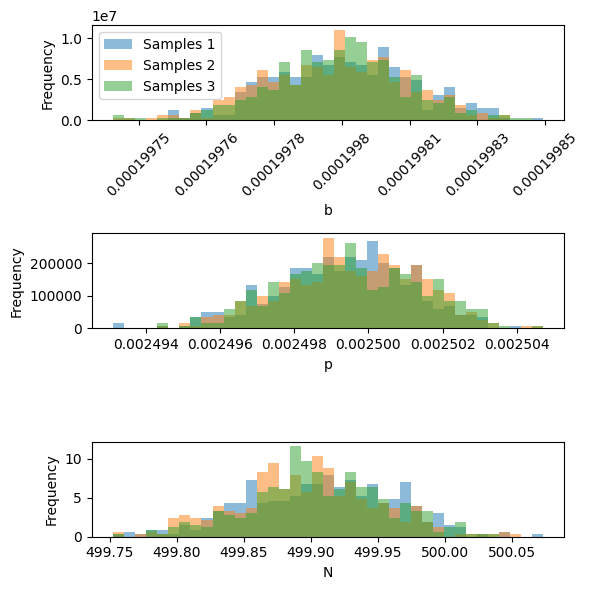

In [98]:
ITERS = 2000
MyHistogram(chains_25[:,int(4*ITERS/5):, :], kde=False, n_percentiles=100, parameter_names=parameter_names)
plt.savefig("0_hist_only_noisy_data_noise_25_additive_moments.png")
plt.show()

Multiplicative noise

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/4197004800.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     156     0:01.5
2     315     0:03.5
3     465     0:04.2
20    2178    0:15.9
40    4023    0:25.3
60    6126    0:36.1
80    8235    0:47.0
100   10419   0:58.3
120   12612   1:09.6
140   14751   1:20.5
160   16965   1:31.7
180   21189   1:53.3
200   25245   2:14.0
220   29655   2:36.3
240   34215   2:59.5
260   38808   3:23.1
280   43548   3:47.1
300   47877   4:09.0
320   52341   4:31.7
340   56610   4:53.4
360   60501   5:13.2
380   64452   5:33.5
400   69117   5:57.4
420   73455   6:19.4
440   77979   6:42.3
460   82245   7:04.0
480   86733   7:26.6
500   91122   7:48.5
520   95634   8:11.3
540   100152   8:34.0
560   104325   8:55.1
580   108738   9:17.3
600   113151   9:39.5
620   117816  10:03.0
640   122451  10:26.3
660   127059  10:49.4
680   131172  11:10.2
700   135705  11:33.0
720   140199  11:55.7
740   143958  12:14.6
760   148560  12:37.9
780 

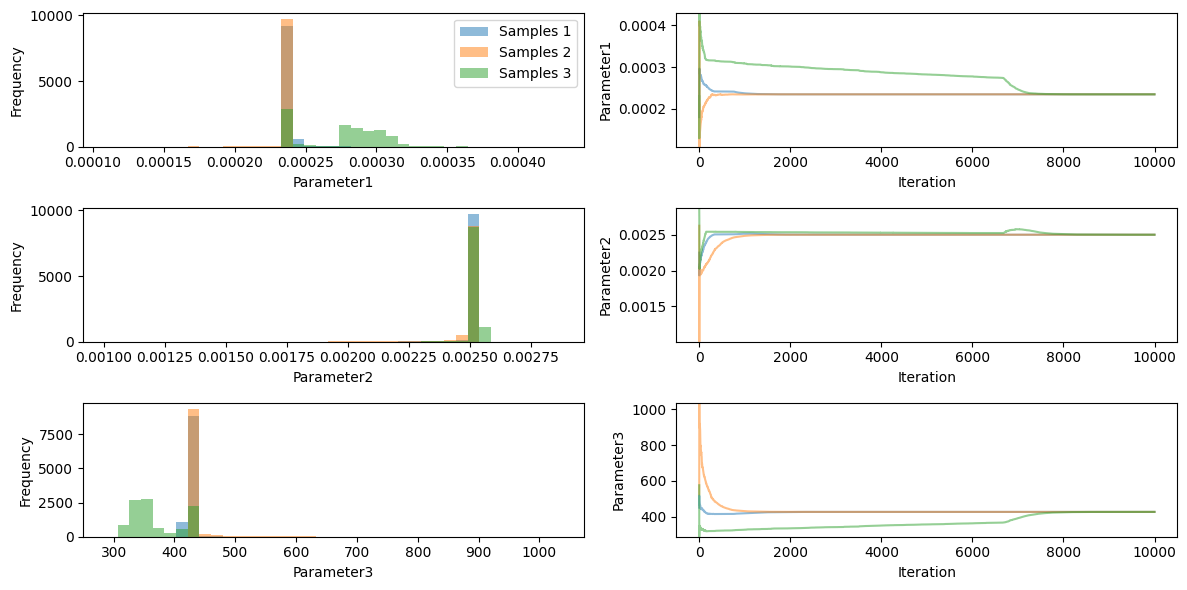

<class '__main__.MyMCMCSummary'>
param    mean     std.     2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
-------  -------  -------  --------  --------  --------  --------  --------  ------  -----  --------------
b        0.00024  1.4e-05  0.000235  0.000235  0.000235  0.000235  0.000281  2.27    21.9   0.0012
p        0.00251  1.5e-05  0.0025    0.0025    0.0025    0.0025    0.00256   2.04    457    0.025
N        417      21.3     358       426       426       426       426       3.05    24.9   0.00136


In [ ]:
# scale = 0.25
# a=-4 # a = -1/scale
# b=4 # b = 1/scale

# noise = 1
# values = org_values * noise * (1 + stats.truncnorm.rvs(a, b, loc=0, scale=scale, size=1))
# problem = pints.MultiOutputProblem(model, times, values)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_prior = pints.UniformLogPrior(
#     [0.0001, 0.001, 100],
#     [0.001, 0.01, 2000]
#     )
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 10000
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains_mult_4 = mcmc.run()
# print(chains_mult_4)

# pints.plot.trace(chains_mult_4)
# plt.savefig("noisy_data_multiplicative_4_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_mult_4[:,int(ITERS/2):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)

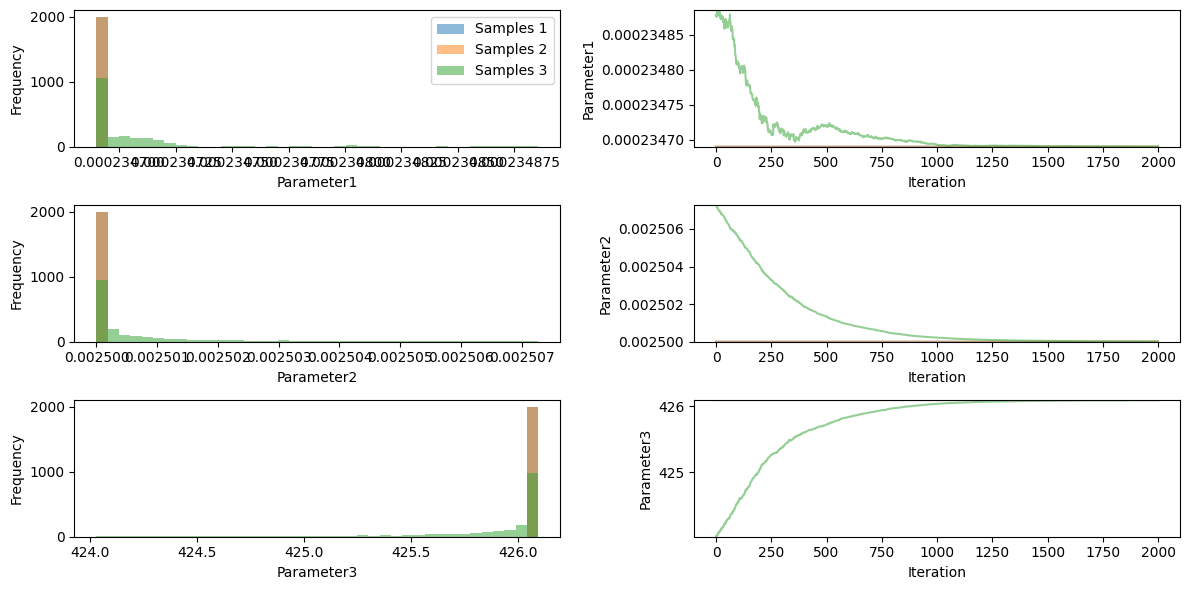

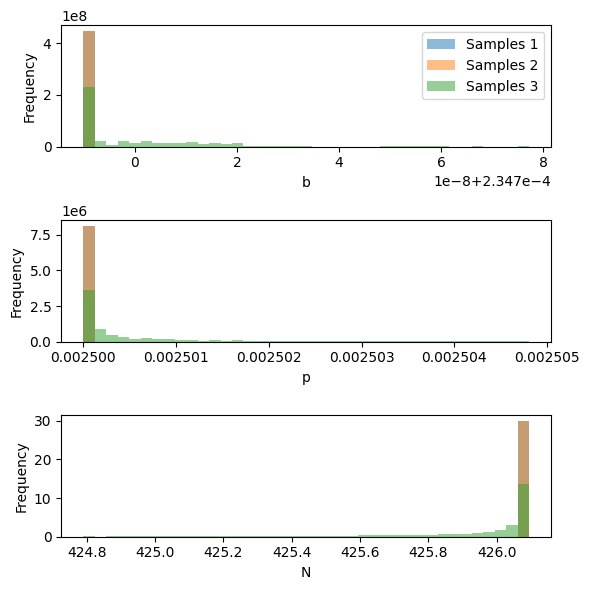

<class '__main__.MyMCMCSummary'>
param    mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
-------  --------  --------  --------  --------  --------  --------  --------  ------  -----  --------------
b        0.000235  1.59e-07  0.000235  0.000235  0.000235  0.000235  0.000235  1.3     20.4   0.000951
p        0.0025    4.43e-06  0.0025    0.0025    0.0025    0.0025    0.00252   1.42    402    0.0188
N        426       1.31      421       426       426       426       426       1.4     14.4   0.000672


In [ ]:
# ITERS=10000
# pints.plot.trace(chains_mult_4[:,int(4*ITERS/5):, :])
# # plt.savefig("noisy_data_additive_full_distribution.png")
# plt.show()

# pints.plot.histogram(chains_mult_4[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
# plt.savefig("hist_only_noisy_data_noise_25_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_mult_4[:,int(3*ITERS/4):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/3811079826.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     153     0:01.6
2     282     0:02.3
3     402     0:02.8
20    2025    0:10.8
40    4059    0:20.9
60    6279    0:31.9
80    8421    0:42.4
100   10680   0:53.5
120   12969   1:04.7
140   14991   1:15.2
160   17151   1:25.8
180   19206   1:36.3
200   21672   1:48.4
220   24084   2:00.1
240   26586   2:12.3
260   28974   2:23.9
280   31425   2:35.9
300   33897   2:47.8
320   36123   2:58.8
340   38613   3:11.0
360   41070   3:22.8
380   43719   3:35.7
400   46260   3:47.9
420   48867   4:00.6
440   51531   4:13.3
460   54291   4:26.8
480   56973   4:39.8
500   59748   4:53.2
520   62583   5:07.0
540   65319   5:20.2
560   68286   5:34.4
580   70926   5:47.1
600   73776   6:01.0
620   76524   6:14.1
640   79296   6:27.4
660   82155   6:41.4
680   85119   6:55.6
700   88026   7:09.7
720   90831   7:23.3
740   93846   7:37.7
760   97074   7:53.4
780   100158   8:08.2
800   103299   8:23.2
820   106485   8:38.6
840   109389   8:52.4
860   112779   9:08.6
880   115806   9:23.2
900   1

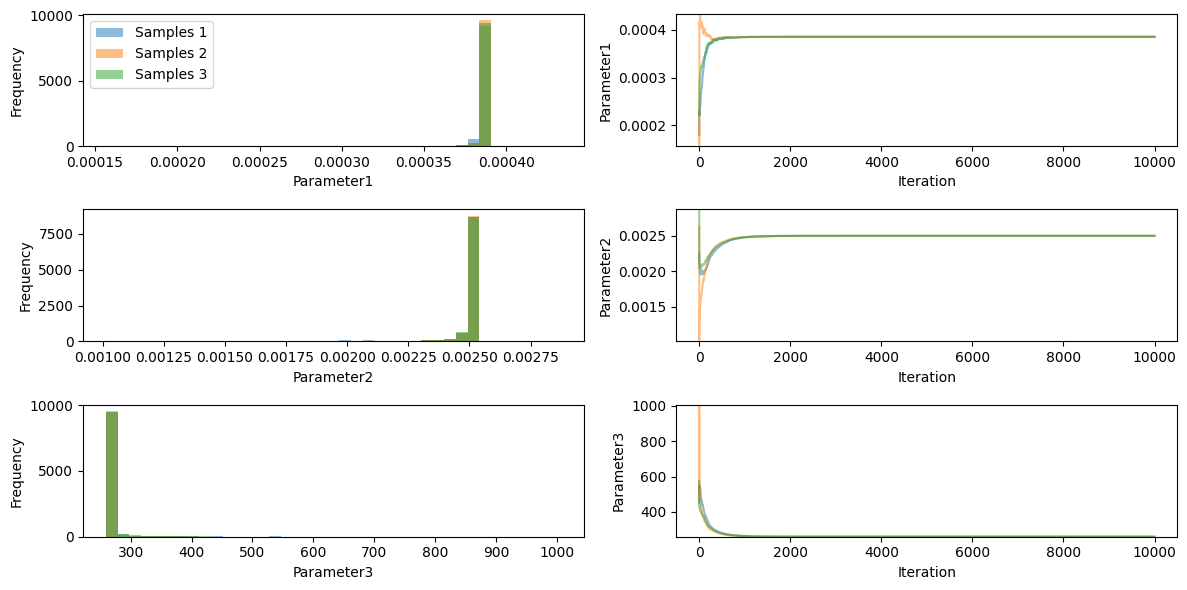

<class '__main__.MyMCMCSummary'>
param    mean      std.      2.5%      25%       50%       75%       97.5%     rhat      ess    ess per sec.
-------  --------  --------  --------  --------  --------  --------  --------  --------  -----  --------------
b        0.000385  8.47e-13  0.000385  0.000385  0.000385  0.000385  0.000385  593       11.6   0.000512
p        0.0025    7.17e-12  0.0025    0.0025    0.0025    0.0025    0.0025    1.01e+03  730    0.0323
N        259       1.24e-06  259       259       259       259       259       2.69e+03  10.8   0.000477


In [ ]:
# scale = 0.5
# a=-2 # a = -1/scale
# b=2 # b = 1/scale

# noise = 1
# values = org_values * noise * (1 + stats.truncnorm.rvs(a, b, loc=0, scale=scale, size=1))
# problem = pints.MultiOutputProblem(model, times, values)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_prior = pints.UniformLogPrior(
#     [0.0001, 0.001, 100],
#     [0.001, 0.01, 2000]
#     )
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 10000
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains_mult_2 = mcmc.run()
# print(chains_mult_2)

# pints.plot.trace(chains_mult_2)
# plt.savefig("noisy_data_multiplicative_2_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_mult_2[:,int(ITERS/2):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/173036842.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     180     0:02.2
2     285     0:03.5
3     381     0:04.1
20    2190    0:14.4
40    4533    0:27.0
60    6744    0:38.8
80    8898    0:49.9
100   11109   1:01.9
120   13386   1:13.9
140   15828   1:26.9
160   18168   1:39.5
180   20478   1:52.8
200   22989   2:06.8
220   25434   2:20.0
240   27714   2:32.5
260   30162   2:45.2
280   32562   2:58.1
300   34935   3:10.1
320   37296   3:22.3
340   39558   3:34.5
360   41910   3:47.5
380   44310   3:59.9
400   46698   4:11.9
420   48948   4:23.0
440   51468   4:35.9
460   53781   4:47.5
480   56418   5:00.6
500   59025   5:13.5
520   61404   5:25.9
540   64029   5:39.2
560   66498   5:51.8
580   69072   6:05.4
600   71712   6:18.6
620   74307   6:31.9
640   77001   6:45.3
660   79524   6:57.9
680   82260   7:12.1
700   84921   7:25.3
720   87603   7:39.1
740   90195   7:52.2
760   92769   8:05.5
780   95250   8:17.9
800   97956   8:31.4
820   100491   8:44.0
840   103005   8:56.8
860   105699   9:10.3
880   108309   9:23.5
900   110

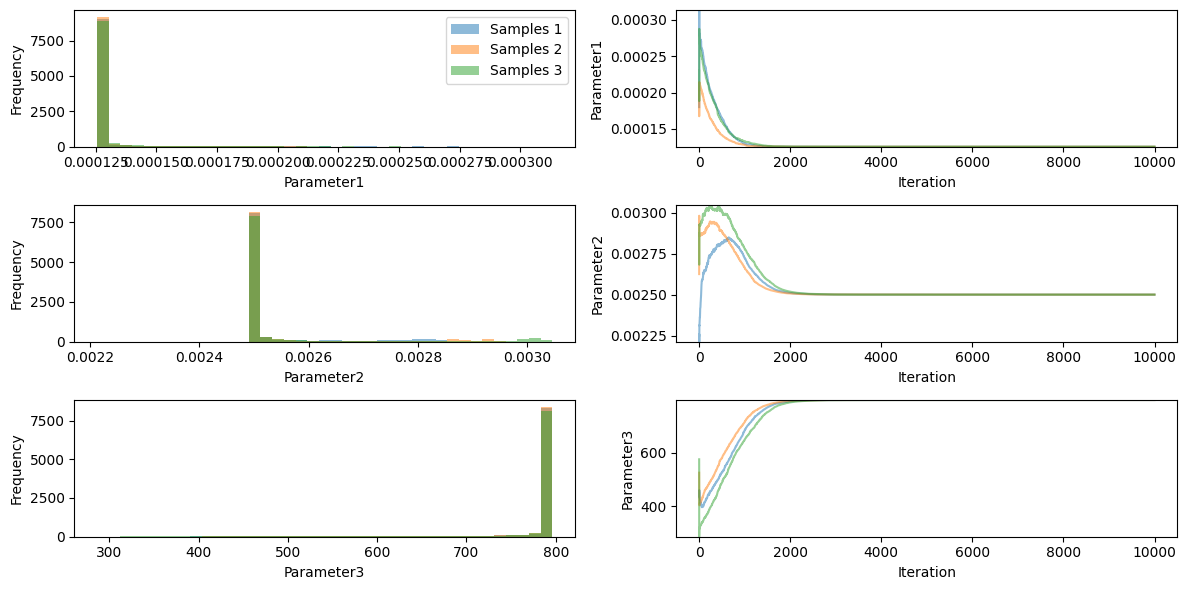

<class '__main__.MyMCMCSummary'>
param    mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
-------  --------  --------  --------  --------  --------  --------  --------  ------  -----  --------------
b        0.000126  1.99e-14  0.000126  0.000126  0.000126  0.000126  0.000126  1.23    50.4   0.00235
p        0.0025    3.02e-13  0.0025    0.0025    0.0025    0.0025    0.0025    1.04    63.6   0.00297
N        796       1.89e-07  796       796       796       796       796       1.06    56.7   0.00265


In [ ]:
# scale = 1
# a=-1 # a = -1/scale
# b=1 # b = 1/scale

# noise = 1
# values = org_values * noise * (1 + stats.truncnorm.rvs(a, b, loc=0, scale=scale, size=1))
# problem = pints.MultiOutputProblem(model, times, values)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_prior = pints.UniformLogPrior(
#     [0.0001, 0.001, 100],
#     [0.001, 0.01, 2000]
#     )
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 10000
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains_mult_1 = mcmc.run()
# print(chains_mult_1)

# pints.plot.trace(chains_mult_1)
# plt.savefig("noisy_data_multiplicative_1_moments.png")
# plt.show()

# parameter_names = ["b","p","N"]
# results = MyMCMCSummary(chains=chains_mult_1[:,int(ITERS/2):, :], time=mcmc.time(),
#                             parameter_names = parameter_names)
# print(type(results))
# print(results)